In [ ]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [ ]:
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [ ]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


0_종일 = all day 


1_주간 = daytime


2_야간 = night time

In [ ]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


2_일반 = general registry

0_입회비반액할인 = 50% of registry fee

1_입회비무료 = free registry fee

In [ ]:
#Join all the tables
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [ ]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [ ]:
#To see when do customers take classes the most
customer_join.groupby("class_name")["customer_id"].count()

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

Can see here that customers prefer 0_종일 the most, which means all day classes

In [ ]:
# To see which event customers enrolled in
customer_join.groupby("campaign_name")["customer_id"].count()

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

2_일반 which is general registry has by far the highest number since free or discounted fee is only given out at certain events for short period of time.

In [ ]:
customer_join.groupby("gender")["customer_id"].count()

gender
F    1983
M    2209
Name: customer_id, dtype: int64

Male customers slightly outnumber female customers

In [ ]:
customer_join.groupby("is_deleted")["customer_id"].count()

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

**Identify trend via uselog**

In [ ]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [ ]:
# usedate data type has to be changed as it's set as object
uselog["usedate"] = uselog["usedate"].apply(pd.to_datetime)

#Delete the day to set as eg. 201804
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog.head()

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [ ]:
# Count the number of times customers used
uselog_months = uselog.groupby(["연월","customer_id"], as_index=False).count()
uselog_months.head()

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7


In [ ]:
# Log_id and usedate have same value so delete one of them and change the name as 'count'
uselog_months.rename(columns={"log_id":"count"}, inplace=True) #inplace=true has to come to keep the column in place
del uselog_months["usedate"]

uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [ ]:
# Find the mean, meidan, max, and min
uselog_customer = uselog_months.groupby("customer_id")["count"].agg(["mean", "median", "max", "min" ])

#drop=False keeps the column as it is
uselog_customer = uselog_customer.reset_index(drop=False) 
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [ ]:
uselog

,log_id,customer_id,usedate,연월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


**Finding out the regulars**


Definition of regularity: frequent visits on certain days for more than 4 times per month e.g. 4th visit on Thursdays on 201804


In [ ]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog 
#0=monday ~ 6=sunday

,log_id,customer_id,usedate,연월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6
...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903,6
197424,L00000049209754,TS979550,2019-03-31,201903,6
197425,L00000049209755,TS995299,2019-03-31,201903,6
197426,L00000049209756,TS995853,2019-03-31,201903,6


In [ ]:
# count the log_id by customer_id, year/date, weekday 
uselog_weekday = uselog.groupby(["customer_id","연월","weekday"], 
                                as_index=False).count()
uselog_weekday

,customer_id,연월,weekday,log_id,usedate
0,AS002855,201804,5,4,4
1,AS002855,201805,2,1,1
2,AS002855,201805,5,4,4
3,AS002855,201806,5,5,5
4,AS002855,201807,1,1,1
...,...,...,...,...,...
93328,TS999855,201901,1,1,1
93329,TS999855,201901,5,4,4
93330,TS999855,201901,6,1,1
93331,TS999855,201902,5,4,4


In [ ]:
del uselog_weekday['usedate']
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [ ]:
#Regular customers: ppl who visited on certain day for more than 4 times
# Find the max visits per each customer
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()

# Make a new column 'regular_flg' to show if the customer is a regular or not
uselog_weekday["regular_flg"] = 0 
#Initially set as 0, which means irregular

uselog_weekday["regular_flg"] = uselog_weekday["regular_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,연월,weekday,count,regular_flg
0,AS002855,201903,6,5,1
1,AS008805,201903,6,4,1
2,AS009013,201804,0,2,0
3,AS009373,201903,6,5,1
4,AS015233,201903,6,5,1


In [ ]:
# Join the uselog_customer, uselog_weekday with customer_join table
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "regular_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,regular_flg
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [ ]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
regular_flg         0
dtype: int64

In [ ]:
# Calculating membership retention period
# Customers who canceled membership: Date of registration - Date of cancellation
# Customers who renewed membership: Date of registration - Date of today
from dateutil.relativedelta import relativedelta #date comparison function

# change the date to datetime type
customer_join["start_date"] = customer_join["start_date"].apply(pd.to_datetime)
customer_join["end_date"] = customer_join["end_date"].apply(pd.to_datetime)

# Adding a column to assess customers who canceled membership
customer_join["calc_date"] = customer_join["end_date"]

# Adding a column to assess customers who renewed membership - set date of today as 20190430
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))

# Make a new column 'membership_period'
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"][i], customer_join["start_date"][i])
    customer_join["membership_period"][i] = delta.years*12 + delta.months
customer_join.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,regular_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [ ]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [ ]:
customer_join.groupby("regular_flg")["customer_id"].count() 
#1 means regular and 0 the opposite

regular_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

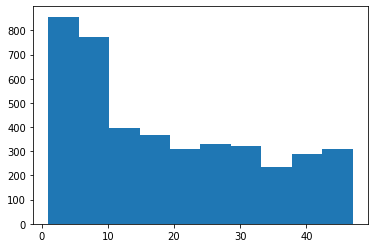

In [ ]:
import matplotlib.pyplot as plt

plt.hist(customer_join["membership_period"])

We can refer customer retention is at the most around 10 months and falls significantly low after 10th month of membership. We have to figure out why this happens among customers who cancelled membership.

In [ ]:
# Filter the expired membership holders by 'is_delete'=1
canceled_customer = customer_join[customer_join["is_deleted"]==1]
canceled_customer.describe()

,is_deleted,price,mean,median,max,min,regular_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [ ]:
# Filter the ongoing membership holders by 'is_delete'=0
customer_stay = customer_join[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,regular_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000
